# Import dependencies

In [1]:
import timm
import torch
import cv2
import matplotlib.pyplot as plt
import time

# Import MiDaS (all versions)

In [2]:
model_type_large = "DPT_Large" 
model_type_medium = "DPT_Hybrid" 
model_type_small = "MiDaS_small"

In [3]:
# Size ~ 1.3G
midas_large = torch.hub.load("intel-isl/MiDaS", model_type_large)

Using cache found in C:\Users\PC/.cache\torch\hub\intel-isl_MiDaS_master


In [4]:
# Size ~ 480M
midas_medium = torch.hub.load("intel-isl/MiDaS", model_type_medium)

Using cache found in C:\Users\PC/.cache\torch\hub\intel-isl_MiDaS_master


In [5]:
# Size ~ 85M
midas_small = torch.hub.load("intel-isl/MiDaS", model_type_small)

Using cache found in C:\Users\PC/.cache\torch\hub\intel-isl_MiDaS_master


Loading weights:  None


Using cache found in C:\Users\PC/.cache\torch\hub\rwightman_gen-efficientnet-pytorch_master


In [6]:
midas_large.to('cpu')
midas_large.eval()

midas_medium.to('cpu')
midas_medium.eval()

midas_small.to('cpu')
midas_small.eval()

print("Setup Complete")

Setup Complete


# Transforms (for image manipulation)

In [7]:
transforms = torch.hub.load('intel-isl/MiDaS', 'transforms')
transform_dpt = transforms.dpt_transform #used to both large and medium
transform_small = transforms.small_transform

Using cache found in C:\Users\PC/.cache\torch\hub\intel-isl_MiDaS_master


# Test function

The test function computes, plots and returns the depth map of an image using a given MiDaS algorithm version

In [13]:
def test_midas(midas_version, transform, img):
    
    img_batch = transform(img).to('cpu')
    
    with torch.no_grad():
        prediction = midas_version(img_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()
    
    depth_map = prediction.cpu().numpy()
    
    return depth_map

# Testing the algorithms

## 1. Test on indoor image

Image dimensions :  (1080, 1920, 3)


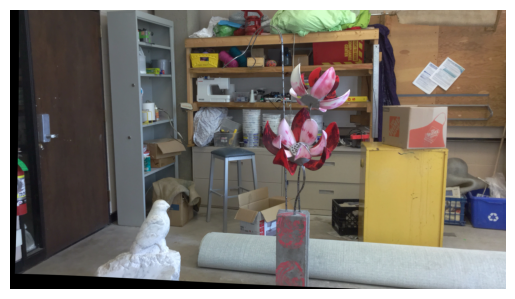

In [12]:
img_indoor = cv2.imread('im0.png')
img_indoor = cv2.cvtColor(img_indoor, cv2.COLOR_BGR2RGB)
print("Image dimensions : ", img_indoor.shape)
plt.imshow(img_indoor)
plt.axis("off")
plt.show()

In [14]:
start_time = time.time()

depth_map_small_indoor = test_midas(midas_small, transform_small, img_indoor)

end_time = time.time()
total_time = end_time - start_time
print(f"Execution time: {total_time} seconds")

Execution time: 1.9799602031707764 seconds


In [16]:
start_time = time.time()

depth_map_medium_indoor = test_midas(midas_medium, transform_dpt, img_indoor)

end_time = time.time()
total_time = end_time - start_time
print(f"Execution time: {total_time} seconds")

Execution time: 12.468979597091675 seconds


In [17]:
start_time = time.time()

depth_map_large_indoor = test_midas(midas_large, transform_dpt, img_indoor)

end_time = time.time()
total_time = end_time - start_time
print(f"Execution time: {total_time} seconds")

Execution time: 191.71555995941162 seconds


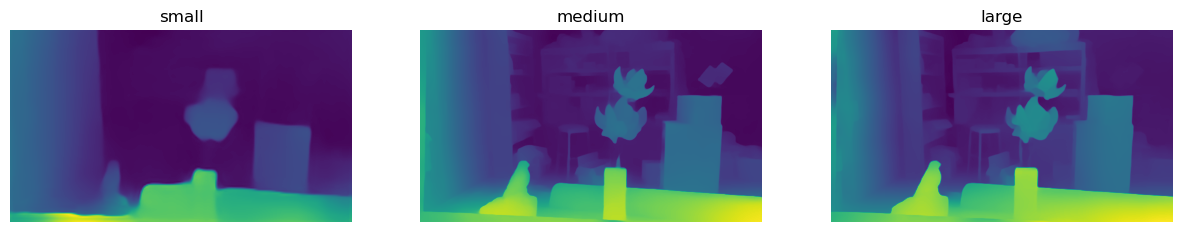

In [25]:
Indoor = [depth_map_small_indoor, depth_map_medium_indoor, depth_map_large_indoor]
Titles = ['small', 'medium', 'large']

fig, ax = plt.subplots(1, 3, figsize=(15, 10))

for i in range(len(Indoor)):
    ax[i].imshow(Indoor[i])
    ax[i].axis('off')
    ax[i].set_title(Titles[i])

plt.show()

## 2. Test on outdoor image

Image dimensions :  (867, 1300, 3)


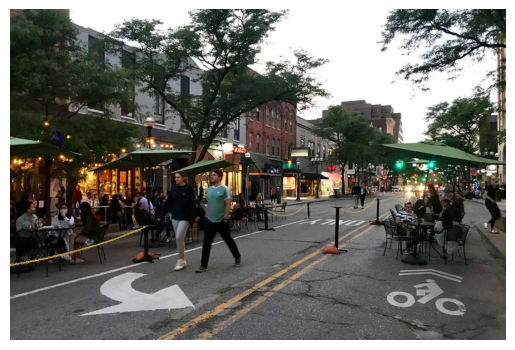

In [27]:
img_outdoor = cv2.imread('im1.jpg')
img_outdoor = cv2.cvtColor(img_outdoor, cv2.COLOR_BGR2RGB)
print("Image dimensions : ", img_outdoor.shape)
plt.imshow(img_outdoor)
plt.axis("off")
plt.show()

In [28]:
start_time = time.time()

depth_map_small_outdoor = test_midas(midas_small, transform_small, img_outdoor)

end_time = time.time()
total_time = end_time - start_time
print(f"Execution time: {total_time} seconds")

Execution time: 8.25421404838562 seconds


In [30]:
start_time = time.time()

depth_map_medium_outdoor = test_midas(midas_medium, transform_dpt, img_outdoor)

end_time = time.time()
total_time = end_time - start_time
print(f"Execution time: {total_time} seconds")

Execution time: 34.501140117645264 seconds


In [31]:
start_time = time.time()

depth_map_large_outdoor = test_midas(midas_large, transform_dpt, img_outdoor)

end_time = time.time()
total_time = end_time - start_time
print(f"Execution time: {total_time} seconds")

Execution time: 181.93764662742615 seconds


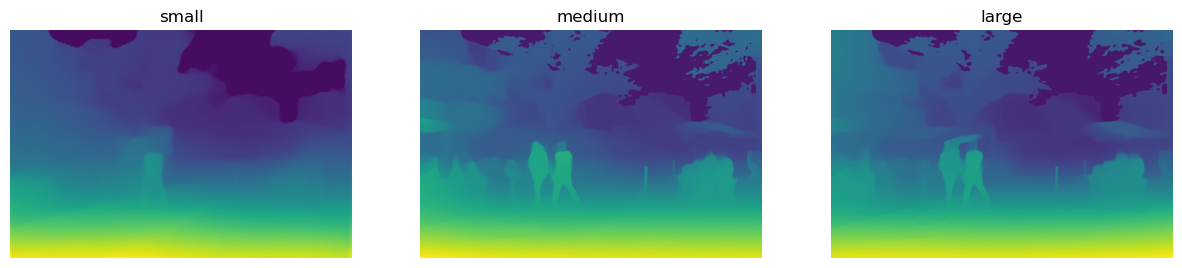

In [33]:
Outdoor = [depth_map_small_outdoor, depth_map_medium_outdoor, depth_map_large_outdoor]

fig, ax = plt.subplots(1, 3, figsize=(15, 10))

for i in range(len(Outdoor)):
    ax[i].imshow(Outdoor[i])
    ax[i].axis('off')
    ax[i].set_title(Titles[i])

plt.show()

## 3. Test on image at night

Image dimensions :  (800, 1200, 3)


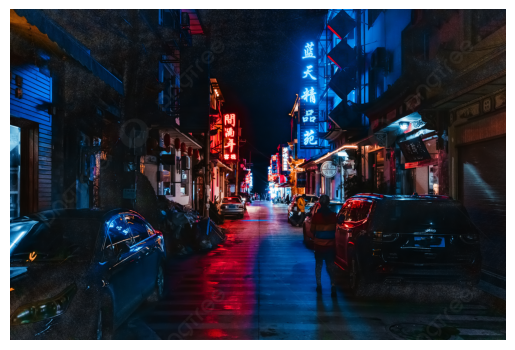

In [34]:
img_night = cv2.imread('im2.jpg')
img_night = cv2.cvtColor(img_night, cv2.COLOR_BGR2RGB)
print("Image dimensions : ", img_night.shape)
plt.imshow(img_night)
plt.axis("off")
plt.show()

In [35]:
start_time = time.time()

depth_map_small_night = test_midas(midas_small, transform_small, img_night)

end_time = time.time()
total_time = end_time - start_time
print(f"Execution time: {total_time} seconds")

Execution time: 19.570818424224854 seconds


In [36]:
start_time = time.time()

depth_map_medium_night = test_midas(midas_medium, transform_dpt, img_night)

end_time = time.time()
total_time = end_time - start_time
print(f"Execution time: {total_time} seconds")

Execution time: 36.285741567611694 seconds


In [37]:
start_time = time.time()

depth_map_large_night = test_midas(midas_large, transform_dpt, img_night)

end_time = time.time()
total_time = end_time - start_time
print(f"Execution time: {total_time} seconds")

Execution time: 181.14979004859924 seconds


In [ ]:
Night = [depth_map_small_night, depth_map_medium_night, depth_map_large_night]

fig, ax = plt.subplots(1, 3, figsize=(15, 10))

for i in range(len(Night)):
    ax[i].imshow(Night[i])
    ax[i].axis('off')
    ax[i].set_title(Titles[i])

plt.show()